# Преобразование данных

In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import sklearn.preprocessing as sp
import csv
import re
import dateutil

np.set_printoptions(linewidth=150, precision=3, suppress=True)

# Plotting config
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/ilia/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
ts_parser = lambda date_str: datetime.datetime.strptime(date_str, "%Y-%m") if pd.notnull(date_str) and date_str else None
df_users = pd.read_csv("hw1_out var4.csv", sep="\t", encoding="utf-8", quoting=csv.QUOTE_NONNUMERIC, converters={"created_at": ts_parser})
# Remove rows with users not found
df_users = df_users[pd.notnull(df_users['name'])]
df_users["lat"].fillna(value=0, inplace=True)
df_users["lon"].fillna(value=0, inplace=True)

Новые признаки для каждого пользователя:
- name_words - количество слов в имени
- screen_name_length - количество символов в псевдониме
- description_length - длина описания
- created_year - год создания аккаунта
- country_code - код страны
- verified - предлагается перевести в тип int

In [3]:
country_codes ={'Afghanistan': 'AF',
 'Albania': 'AL',
 'Algeria': 'DZ',
 'American Samoa': 'AS',
 'Andorra': 'AD',
 'Angola': 'AO',
 'Anguilla': 'AI',
 'Antarctica': 'AQ',
 'Antigua and Barbuda': 'AG',
 'Argentina': 'AR',
 'Armenia': 'AM',
 'Aruba': 'AW',
 'Australia': 'AU',
 'Austria': 'AT',
 'Azerbaijan': 'AZ',
 'Bahamas': 'BS',
 'Bahrain': 'BH',
 'Bangladesh': 'BD',
 'Barbados': 'BB',
 'Belarus': 'BY',
 'Belgium': 'BE',
 'Belize': 'BZ',
 'Benin': 'BJ',
 'Bermuda': 'BM',
 'Bhutan': 'BT',
 'Bolivia, Plurinational State of': 'BO',
 'Bonaire, Sint Eustatius and Saba': 'BQ',
 'Bosnia and Herzegovina': 'BA',
 'Botswana': 'BW',
 'Bouvet Island': 'BV',
 'Brazil': 'BR',
 'British Indian Ocean Territory': 'IO',
 'Brunei Darussalam': 'BN',
 'Bulgaria': 'BG',
 'Burkina Faso': 'BF',
 'Burundi': 'BI',
 'Cambodia': 'KH',
 'Cameroon': 'CM',
 'Canada': 'CA',
 'Cape Verde': 'CV',
 'Cayman Islands': 'KY',
 'Central African Republic': 'CF',
 'Chad': 'TD',
 'Chile': 'CL',
 'China': 'CN',
 'Christmas Island': 'CX',
 'Cocos (Keeling) Islands': 'CC',
 'Colombia': 'CO',
 'Comoros': 'KM',
 'Congo': 'CG',
 'Congo, the Democratic Republic of the': 'CD',
 'Cook Islands': 'CK',
 'Costa Rica': 'CR',
 'Country name': 'Code',
 'Croatia': 'HR',
 'Cuba': 'CU',
 'Curaçao': 'CW',
 'Cyprus': 'CY',
 'Czech Republic': 'CZ',
 "Côte d'Ivoire": 'CI',
 'Denmark': 'DK',
 'Djibouti': 'DJ',
 'Dominica': 'DM',
 'Dominican Republic': 'DO',
 'Ecuador': 'EC',
 'Egypt': 'EG',
 'El Salvador': 'SV',
 'Equatorial Guinea': 'GQ',
 'Eritrea': 'ER',
 'Estonia': 'EE',
 'Ethiopia': 'ET',
 'Falkland Islands (Malvinas)': 'FK',
 'Faroe Islands': 'FO',
 'Fiji': 'FJ',
 'Finland': 'FI',
 'France': 'FR',
 'French Guiana': 'GF',
 'French Polynesia': 'PF',
 'French Southern Territories': 'TF',
 'Gabon': 'GA',
 'Gambia': 'GM',
 'Georgia': 'GE',
 'Germany': 'DE',
 'Ghana': 'GH',
 'Gibraltar': 'GI',
 'Greece': 'GR',
 'Greenland': 'GL',
 'Grenada': 'GD',
 'Guadeloupe': 'GP',
 'Guam': 'GU',
 'Guatemala': 'GT',
 'Guernsey': 'GG',
 'Guinea': 'GN',
 'Guinea-Bissau': 'GW',
 'Guyana': 'GY',
 'Haiti': 'HT',
 'Heard Island and McDonald Islands': 'HM',
 'Holy See (Vatican City State)': 'VA',
 'Honduras': 'HN',
 'Hong Kong': 'HK',
 'Hungary': 'HU',
 'ISO 3166-2:GB': '(.uk)',
 'Iceland': 'IS',
 'India': 'IN',
 'Indonesia': 'ID',
 'Iran, Islamic Republic of': 'IR',
 'Iraq': 'IQ',
 'Ireland': 'IE',
 'Isle of Man': 'IM',
 'Israel': 'IL',
 'Italy': 'IT',
 'Jamaica': 'JM',
 'Japan': 'JP',
 'Jersey': 'JE',
 'Jordan': 'JO',
 'Kazakhstan': 'KZ',
 'Kenya': 'KE',
 'Kiribati': 'KI',
 "Korea, Democratic People's Republic of": 'KP',
 'Korea, Republic of': 'KR',
 'Kuwait': 'KW',
 'Kyrgyzstan': 'KG',
 "Lao People's Democratic Republic": 'LA',
 'Latvia': 'LV',
 'Lebanon': 'LB',
 'Lesotho': 'LS',
 'Liberia': 'LR',
 'Libya': 'LY',
 'Liechtenstein': 'LI',
 'Lithuania': 'LT',
 'Luxembourg': 'LU',
 'Macao': 'MO',
 'Macedonia, the former Yugoslav Republic of': 'MK',
 'Madagascar': 'MG',
 'Malawi': 'MW',
 'Malaysia': 'MY',
 'Maldives': 'MV',
 'Mali': 'ML',
 'Malta': 'MT',
 'Marshall Islands': 'MH',
 'Martinique': 'MQ',
 'Mauritania': 'MR',
 'Mauritius': 'MU',
 'Mayotte': 'YT',
 'Mexico': 'MX',
 'Micronesia, Federated States of': 'FM',
 'Moldova, Republic of': 'MD',
 'Monaco': 'MC',
 'Mongolia': 'MN',
 'Montenegro': 'ME',
 'Montserrat': 'MS',
 'Morocco': 'MA',
 'Mozambique': 'MZ',
 'Myanmar': 'MM',
 'Namibia': 'NA',
 'Nauru': 'NR',
 'Nepal': 'NP',
 'Netherlands': 'NL',
 'New Caledonia': 'NC',
 'New Zealand': 'NZ',
 'Nicaragua': 'NI',
 'Niger': 'NE',
 'Nigeria': 'NG',
 'Niue': 'NU',
 'Norfolk Island': 'NF',
 'Northern Mariana Islands': 'MP',
 'Norway': 'NO',
 'Oman': 'OM',
 'Pakistan': 'PK',
 'Palau': 'PW',
 'Palestine, State of': 'PS',
 'Panama': 'PA',
 'Papua New Guinea': 'PG',
 'Paraguay': 'PY',
 'Peru': 'PE',
 'Philippines': 'PH',
 'Pitcairn': 'PN',
 'Poland': 'PL',
 'Portugal': 'PT',
 'Puerto Rico': 'PR',
 'Qatar': 'QA',
 'Romania': 'RO',
 'Russian Federation': 'RU',
 'Rwanda': 'RW',
 'Réunion': 'RE',
 'Saint Barthélemy': 'BL',
 'Saint Helena, Ascension and Tristan da Cunha': 'SH',
 'Saint Kitts and Nevis': 'KN',
 'Saint Lucia': 'LC',
 'Saint Martin (French part)': 'MF',
 'Saint Pierre and Miquelon': 'PM',
 'Saint Vincent and the Grenadines': 'VC',
 'Samoa': 'WS',
 'San Marino': 'SM',
 'Sao Tome and Principe': 'ST',
 'Saudi Arabia': 'SA',
 'Senegal': 'SN',
 'Serbia': 'RS',
 'Seychelles': 'SC',
 'Sierra Leone': 'SL',
 'Singapore': 'SG',
 'Sint Maarten (Dutch part)': 'SX',
 'Slovakia': 'SK',
 'Slovenia': 'SI',
 'Solomon Islands': 'SB',
 'Somalia': 'SO',
 'South Africa': 'ZA',
 'South Georgia and the South Sandwich Islands': 'GS',
 'South Sudan': 'SS',
 'Spain': 'ES',
 'Sri Lanka': 'LK',
 'Sudan': 'SD',
 'Suriname': 'SR',
 'Svalbard and Jan Mayen': 'SJ',
 'Swaziland': 'SZ',
 'Sweden': 'SE',
 'Switzerland': 'CH',
 'Syrian Arab Republic': 'SY',
 'Taiwan, Province of China': 'TW',
 'Tajikistan': 'TJ',
 'Tanzania, United Republic of': 'TZ',
 'Thailand': 'TH',
 'Timor-Leste': 'TL',
 'Togo': 'TG',
 'Tokelau': 'TK',
 'Tonga': 'TO',
 'Trinidad and Tobago': 'TT',
 'Tunisia': 'TN',
 'Turkey': 'TR',
 'Turkmenistan': 'TM',
 'Turks and Caicos Islands': 'TC',
 'Tuvalu': 'TV',
 'Uganda': 'UG',
 'Ukraine': 'UA',
 'United Arab Emirates': 'AE',
 'United Kingdom': 'GB',
 'United States': 'US',
 'United States Minor Outlying Islands': 'UM',
 'Uruguay': 'UY',
 'Uzbekistan': 'UZ',
 'Vanuatu': 'VU',
 'Venezuela, Bolivarian Republic of': 'VE',
 'Viet Nam': 'VN',
 'Virgin Islands, British': 'VG',
 'Virgin Islands, U.S.': 'VI',
 'Wallis and Futuna': 'WF',
 'Western Sahara': 'EH',
 'Yemen': 'YE',
 'Zambia': 'ZM',
 'Zimbabwe': 'ZW',
 'Åland Islands': 'AX'}

In [5]:
#get unique id for each country
z=0
for i in country_codes.iterkeys():
    z+=1
    country_codes[i] = z

print country_codes

{'Afghanistan': 26,
 'Albania': 139,
 'Algeria': 199,
 'American Samoa': 57,
 'Andorra': 58,
 'Angola': 178,
 'Anguilla': 94,
 'Antarctica': 247,
 'Antigua and Barbuda': 222,
 'Argentina': 121,
 'Armenia': 167,
 'Aruba': 120,
 'Australia': 64,
 'Austria': 187,
 'Azerbaijan': 145,
 'Bahamas': 135,
 'Bahrain': 39,
 'Bangladesh': 196,
 'Barbados': 86,
 'Belarus': 198,
 'Belgium': 203,
 'Belize': 69,
 'Benin': 162,
 'Bermuda': 158,
 'Bhutan': 226,
 'Bolivia, Plurinational State of': 90,
 'Bonaire, Sint Eustatius and Saba': 14,
 'Bosnia and Herzegovina': 12,
 'Botswana': 114,
 'Bouvet Island': 229,
 'Brazil': 192,
 'British Indian Ocean Territory': 165,
 'Brunei Darussalam': 185,
 'Bulgaria': 175,
 'Burkina Faso': 8,
 'Burundi': 223,
 'Cambodia': 118,
 'Cameroon': 7,
 'Canada': 1,
 'Cape Verde': 124,
 'Cayman Islands': 40,
 'Central African Republic': 43,
 'Chad': 180,
 'Chile': 201,
 'China': 166,
 'Christmas Island': 18,
 'Cocos (Keeling) Islands': 11,
 'Colombia': 84,
 'Comoros': 251,
 '

In [5]:
def create_new_features(df_users, features):
    # Introduce new features
    new_features_columns = ["name_words", "screen_name_length", "description_length", "created_year", "country_code", "verified"]
    features += new_features_columns
    new_features = []
    # Add new_features to features
    for j, i in df_users.iterrows(): #convert out dataframe to list of dicts
        f1 = len(i['name'].split())
        f2 = len(i['screen_name'])
        try:
            f3 = len(i['description'])
        except Exception as e:
            f3 = 0
        f4 = i['created_at'].year
        if country_codes.has_key(i['country']): 
            f5 = country_codes[i['country']] 
        else:
            f5 = 0
            #print i['country']
        f6 = 1 if i['verified'] else 0
        record ={
            "name_words" : f1,
            "screen_name_length" : f2, 
            "description_length" : f3, 
            "created_year" : f4, 
            "country_code" : f5, 
            "verified" : f6
        }
        new_features.append(record)
    #features = pd.DataFrame(new_features, columns = new_features_columns)
    new_features = pd.DataFrame(new_features, columns = new_features_columns)
    df_users = df_users.drop('verified', 1)
    df_users = pd.concat([df_users, new_features], axis = 1)
    # Calculate new features and place them into data frame
    # place tour code here
    
    return df_users, features

In [6]:
features = ["lat", "lon", "followers_count", "friends_count", "statuses_count", "favourites_count", "listed_count"]
df_users, features = create_new_features(df_users, features)

In [7]:
x = df_users[pd.notnull(df_users.cat)][features].values
y = df_users[pd.notnull(df_users.cat)]["cat"].values

In [8]:
def find_correlated_features(x, features):
    # replace this code to find really correlated features
    corr_matrix = abs(np.corrcoef(x.T))
    for i, feature_i in enumerate(features):
        for j, feature_j in enumerate(features):
            if i < j and  corr_matrix[i,j] > 0.2:
                print "Correlated features: %s + %s -> %.2f" % (feature_i, feature_j, corr_matrix[i,j])
    

In [9]:
find_correlated_features(x, features)

Correlated features: lat + lon -> 0.77
Correlated features: lat + country_code -> 0.44
Correlated features: followers_count + friends_count -> 0.80
Correlated features: followers_count + listed_count -> 0.93
Correlated features: friends_count + listed_count -> 0.71
Correlated features: statuses_count + favourites_count -> 0.28
Correlated features: listed_count + verified -> 0.21
Correlated features: screen_name_length + created_year -> 0.20


Выделилось 3 группы признаков:
1. Основанные на географии:  "lat", "lon", "country_code"
2. Основанные на социальной активности:  "verified", "followers_count", "friends_count", "statuses_count", "favourites_count", "listed_count", "created_year"
3. Остальные:  "name_words", "screen_name_length", "description_length"

Построим взаимные распределения пар признаков в каждой из групп, а также гистограмму значений каждого из признаков с учетом целевой переменной.

Необходимо реалиpовать функции: plot_two_features_scatter для построения взаимного распределения пары признаков, plot_feature_histogram для построения гистограммы значений, plot_dataset для построения набора графиков по разным парам признаков.

In [11]:
def plot_two_features_scatter(x_i, x_j, y, ax):
    
    # Set colors and plot scatter
    ax.scatter(x_j[y==1], x_i[y==1], color='g', alpha=0.5, marker='.')
    ax.scatter(x_j[y==0], x_i[y==0], color='r', alpha=0.5, marker='.')
    return    

    
def plot_feature_histogram(x_i, y, ax):
    ax.hist((x_i[y == 1],  x_i[y == 0]),  bins = 20, rwidth = 0.3, edgecolor = 'none', color = ('green','red'))
    return

def plot_dataset(x, y, features):
    l = len(features)
    fig, ax = pl.subplots(l, l)
    fig.subplots_adjust(bottom=0, left=0, top=2, right=2)
    for i, feature_i in enumerate(features):
        for j, feature_j in enumerate(features):
            
            if i==0: ax[i, j].set_title(feature_j)
            if j==0: ax[i, j].set_ylabel(feature_i)
            ax[i, j].axes.get_xaxis().set_ticks([])
            ax[i, j].axes.get_yaxis().set_ticks([])
            if i != j:
                    plot_two_features_scatter(x[:,i], x[:,j], y, ax[i,j])            
            else:
                plot_feature_histogram(x[:,i], y, ax[i,j])
    
    pl.show()


# Построим попарные распределения географических признаков 

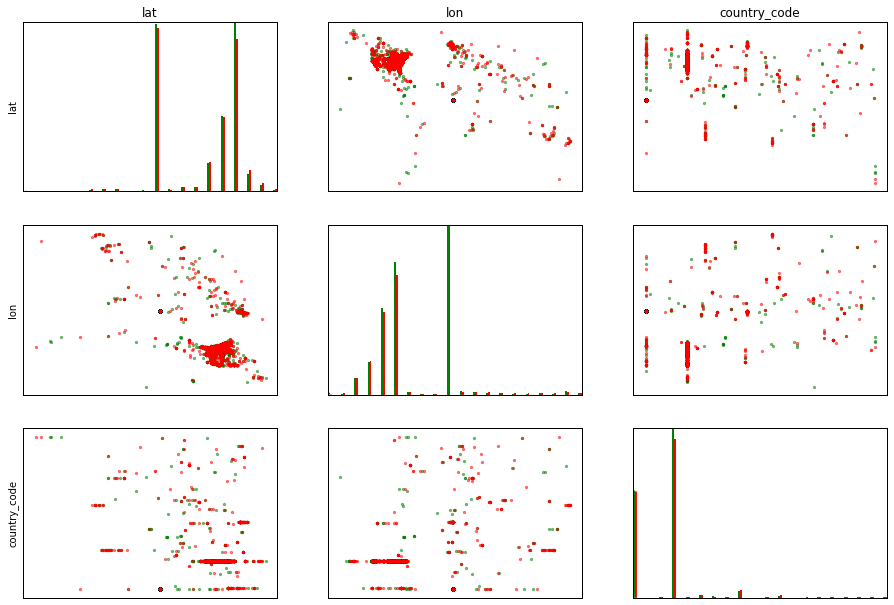

In [12]:
geo_features_new = ["lat", "lon", "country_code"]
geo_features = [f for f in geo_features_new if f in features]
eps = 0.001
geo_feature_ind = [i for i, f in enumerate(features) if f in geo_features]
geo_x = x[:, geo_feature_ind]
zero_ind = np.where(np.where(abs(np.sum(geo_x, axis=1))==0))
geo_x = np.delete(geo_x, zero_ind[0], 0)
geo_y = np.delete(y, zero_ind[0], 0)
plot_dataset(geo_x, geo_y, geo_features)

Четко видны очертания карты и то, что большинство пользователей происходят из небольшого набора стран. Если принять во внимание конечную цель -- кластеризацию пользователей -- логично предположить, что использование географических признаков для описания пользователя может оказаться не очень полезным. Причина в том, что эти признаки четко пространственно разделены (как минимум, океанами и морями). Поэтому мы рискуем вместо "интересной" кластеризации получить просто кластеры, которые будут представлять разные страны. В дальнейшем мы исключим географические признаки из рассмотрения при кластеризации пользователей.

# Построим попарные распределения географических признаков 

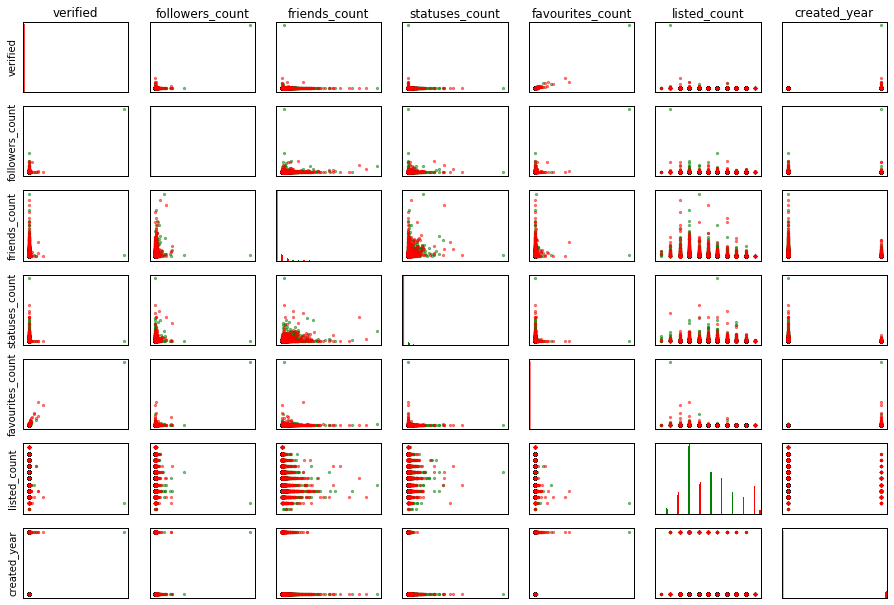

In [13]:
social_features_new = ["verified", "followers_count", "friends_count", "statuses_count", "favourites_count", "listed_count", "created_year"]
social_features = [f for f in social_features_new if f in features]
social_feature_ind = [i for i, f in enumerate(features) if f in social_features]
plot_dataset(x[:, social_feature_ind], y, social_features)

Из графиков видно, что признаки "followers_count", "friends_count", "statuses_count", "favourites_count", "listed_count" сильно смещены в сторону небольших значений. В таком случае удобно сделать логарифмическое преобразрвание этих признаков, то есть применить к их значениям $x_{ij}$ функцию $\log(1 + x_{ij})$. 

In [14]:
def log_transform_features(data, features, transformed_features):
    f_list=[]
    x2=data.copy()  #It's 3:16 am, I wanna to sleep.
    for i, j in enumerate(features):
        if j in transformed_features:
            f_list.append(i)
    replacement = np.log1p(x[:, f_list])
    x2[:, f_list] = replacement
    return x2

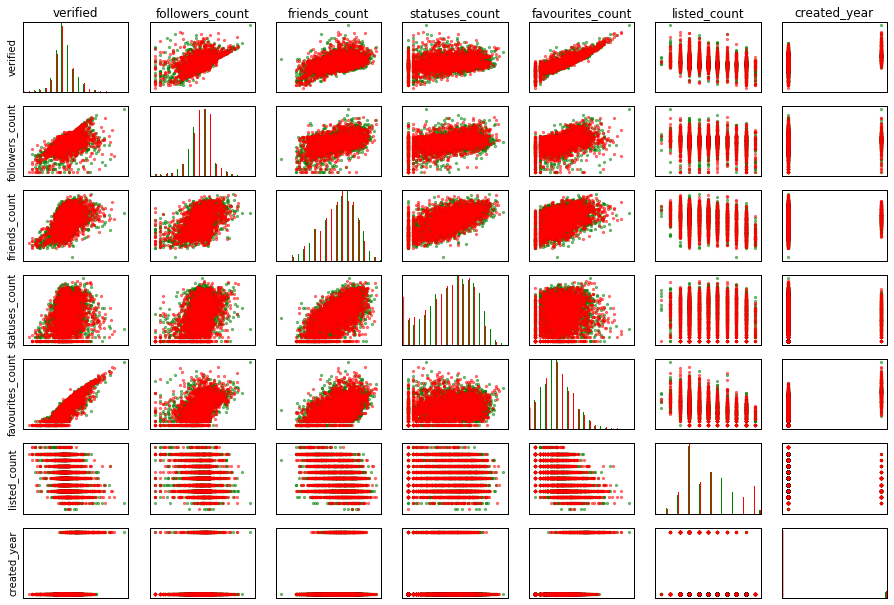

In [15]:
transformed_features = ["followers_count", "friends_count", "statuses_count", "favourites_count", "listed_count"]
x = log_transform_features(x, features, transformed_features)

# Re-plot features
plot_dataset(x[:, social_feature_ind], y, social_features)

Сразу бросается в глаза, что признак "verified" сильно смещен -- верифицированных пользователей очень мало. Более того, все верифицированные пользователи имеют много фолловеров, поэтому часть информации о верификации дублируется в признаке "followers_count". По этой причине в дальнейшем не будем рассмтаривать признак "verified".

После того как мы с помощью логарифмического преобразования избавились от сильной скошенности признаков, можно наблюдать некоторые интересные зависимости. Например, пользователи, имеющие много фолловеров, обязательно имеют много статусов. Следовательно, чтобы стать популярным, обязательно нужно много писать. Анализ других зависимостей остается как упражнение.


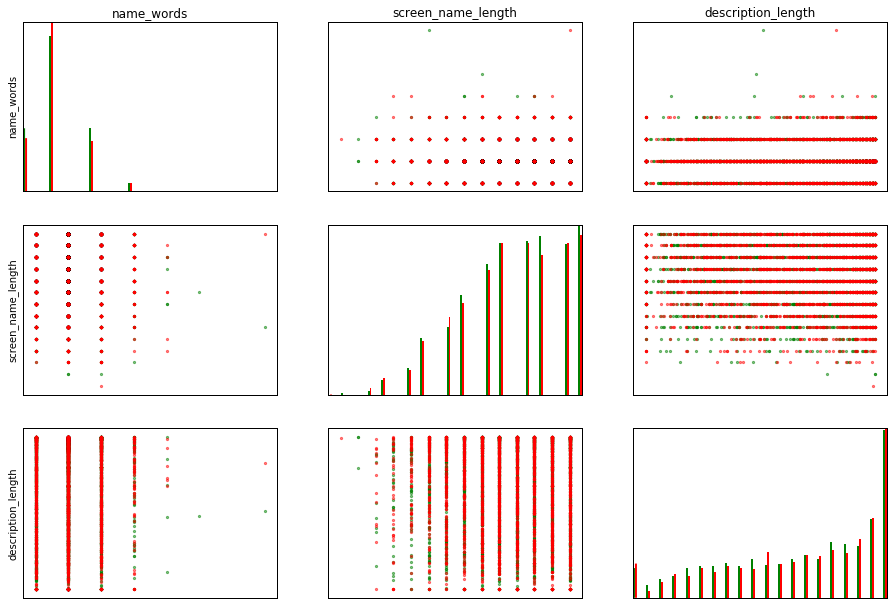

In [16]:
other_features_new = ["name_words", "screen_name_length", "description_length"]
other_features = [f for f in other_features_new if f in features]
other_feature_ind = [i for i, f in enumerate(features) if f in other_features]
plot_dataset(x[:, other_feature_ind], y, other_features)

In [11]:
selected_features = ["followers_count", "friends_count", "statuses_count", "favourites_count", 
                     "listed_count", "created_year", "name_words", "screen_name_length", "description_length"]

x_1 = df_users[selected_features].values
y = df_users["cat"].values

# x_1 = x[:, selected_features_ind]
# Replace nan with 0-s
# Is there a smarter way?
x_1[np.isnan(x_1)] = 0
x_min = x_1.min(axis=0)
x_max = x_1.max(axis=0)
x_new = (x_1 - x_min) / (x_max - x_min)

In [12]:
df_out = pd.DataFrame(data=x_1, index=df_users["uid"], columns=[f for f in selected_features])
df_out.to_csv("hw2_out_not_normal.csv", sep="\t")